### Summary

The dataset used in this section is Ames Housing. This is a data set about house's sale price in Australia. The dataset includes features like House Style, Overall Quality, Lot Area, Sale Price, so on and so forth.

Step by step, the author took  basic steps on dataset before conducting EDA. This conclude checking the info, missing value, variables distribution, drop nan 
Next, the author perform cleaning and egineer the features
Some insights are going to be taken note 
finally, an hypothesis testing is going to be performed for further analysis.

In [22]:
pwd

'C:\\Users\\DELL'

In [37]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

In [4]:
filepath = 'C:\\Users\\DELL\\Desktop\\Data-IBM course\\Machine learning\\week 1\\variable transformation\\data/Ames_Housing_Data.tsv'
df= pd.read_csv(filepath, sep ='\t')


In [5]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
#Since the author recommended to delete some outliers in feature "Gr Liv Arena"
df= df.loc[df['Gr Liv Area'] <= 4000,:]
print(df.shape[0])
print(df.shape[1])

2925
82


In [8]:
data= df.copy()

Filter category feature and encode them

In [10]:
df.drop(['Order', 'PID'], axis= 1, inplace= True)
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [13]:
skew_limit = 0.75


In [18]:
num_cols= df.select_dtypes('number').columns
skew_vals= df[num_cols].skew().sort_values(ascending= False)

In [19]:
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending = False)
skew_cols

Misc Val           22.225015
Pool Area          18.743766
Lot Area           13.200004
Low Qual Fin SF    12.107629
3Ssn Porch         11.393854
Kitchen AbvGr       4.309573
BsmtFin SF 2        4.135900
Enclosed Porch      4.010586
Bsmt Half Bath      3.965970
Screen Porch        3.953495
Mas Vnr Area        2.565458
Open Porch SF       2.495162
Wood Deck SF        1.848286
SalePrice           1.591072
MS SubClass         1.356549
Lot Frontage        1.111071
1st Flr SF          0.942615
Bsmt Unf SF         0.925021
Gr Liv Area         0.878879
2nd Flr SF          0.847517
BsmtFin SF 1        0.821985
dtype: float64

In [27]:
for i in skew_cols.index.values:
    df[i]= df[i].apply(np.log1p)

In [49]:
df.isnull().sum().sort_values(ascending= False)

Pool QC         2914
Misc Feature    2820
Alley           2727
Fence           2354
Fireplace Qu    1422
                ... 
Heating QC         0
MS Zoning          0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 80, dtype: int64

In [45]:
smaller_df= df[['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2925.0,9.090148,0.508309,7.170888,8.914492,9.151545,9.351493,12.279537
Overall Qual,2925.0,6.088205,1.402953,1.000000,5.000000,6.000000,7.000000,10.000000
Overall Cond,2925.0,5.563761,1.112262,1.000000,5.000000,5.000000,6.000000,9.000000
Year Built,2925.0,1971.302906,30.242474,1872.000000,1954.000000,1973.000000,2001.000000,2010.000000
Year Remod/Add,2925.0,1984.234188,20.861774,1950.000000,1965.000000,1993.000000,2004.000000,2010.000000
Gr Liv Area,2925.0,7.258784,0.320753,5.814131,7.027315,7.273786,7.462215,8.248267
Full Bath,2925.0,1.564786,0.551386,0.000000,1.000000,2.000000,2.000000,4.000000
Bedroom AbvGr,2925.0,2.853675,0.827737,0.000000,2.000000,3.000000,3.000000,8.000000
Fireplaces,2925.0,0.596923,0.645349,0.000000,0.000000,1.000000,1.000000,4.000000
Garage Cars,2924.0,1.765048,0.759834,0.000000,1.000000,2.000000,2.000000,5.000000


In [47]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 338.8 KB


In [51]:
smaller_df= smaller_df.fillna(0)

In [52]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   float64
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   float64
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 338.8 KB


In [56]:
import seaborn as sns

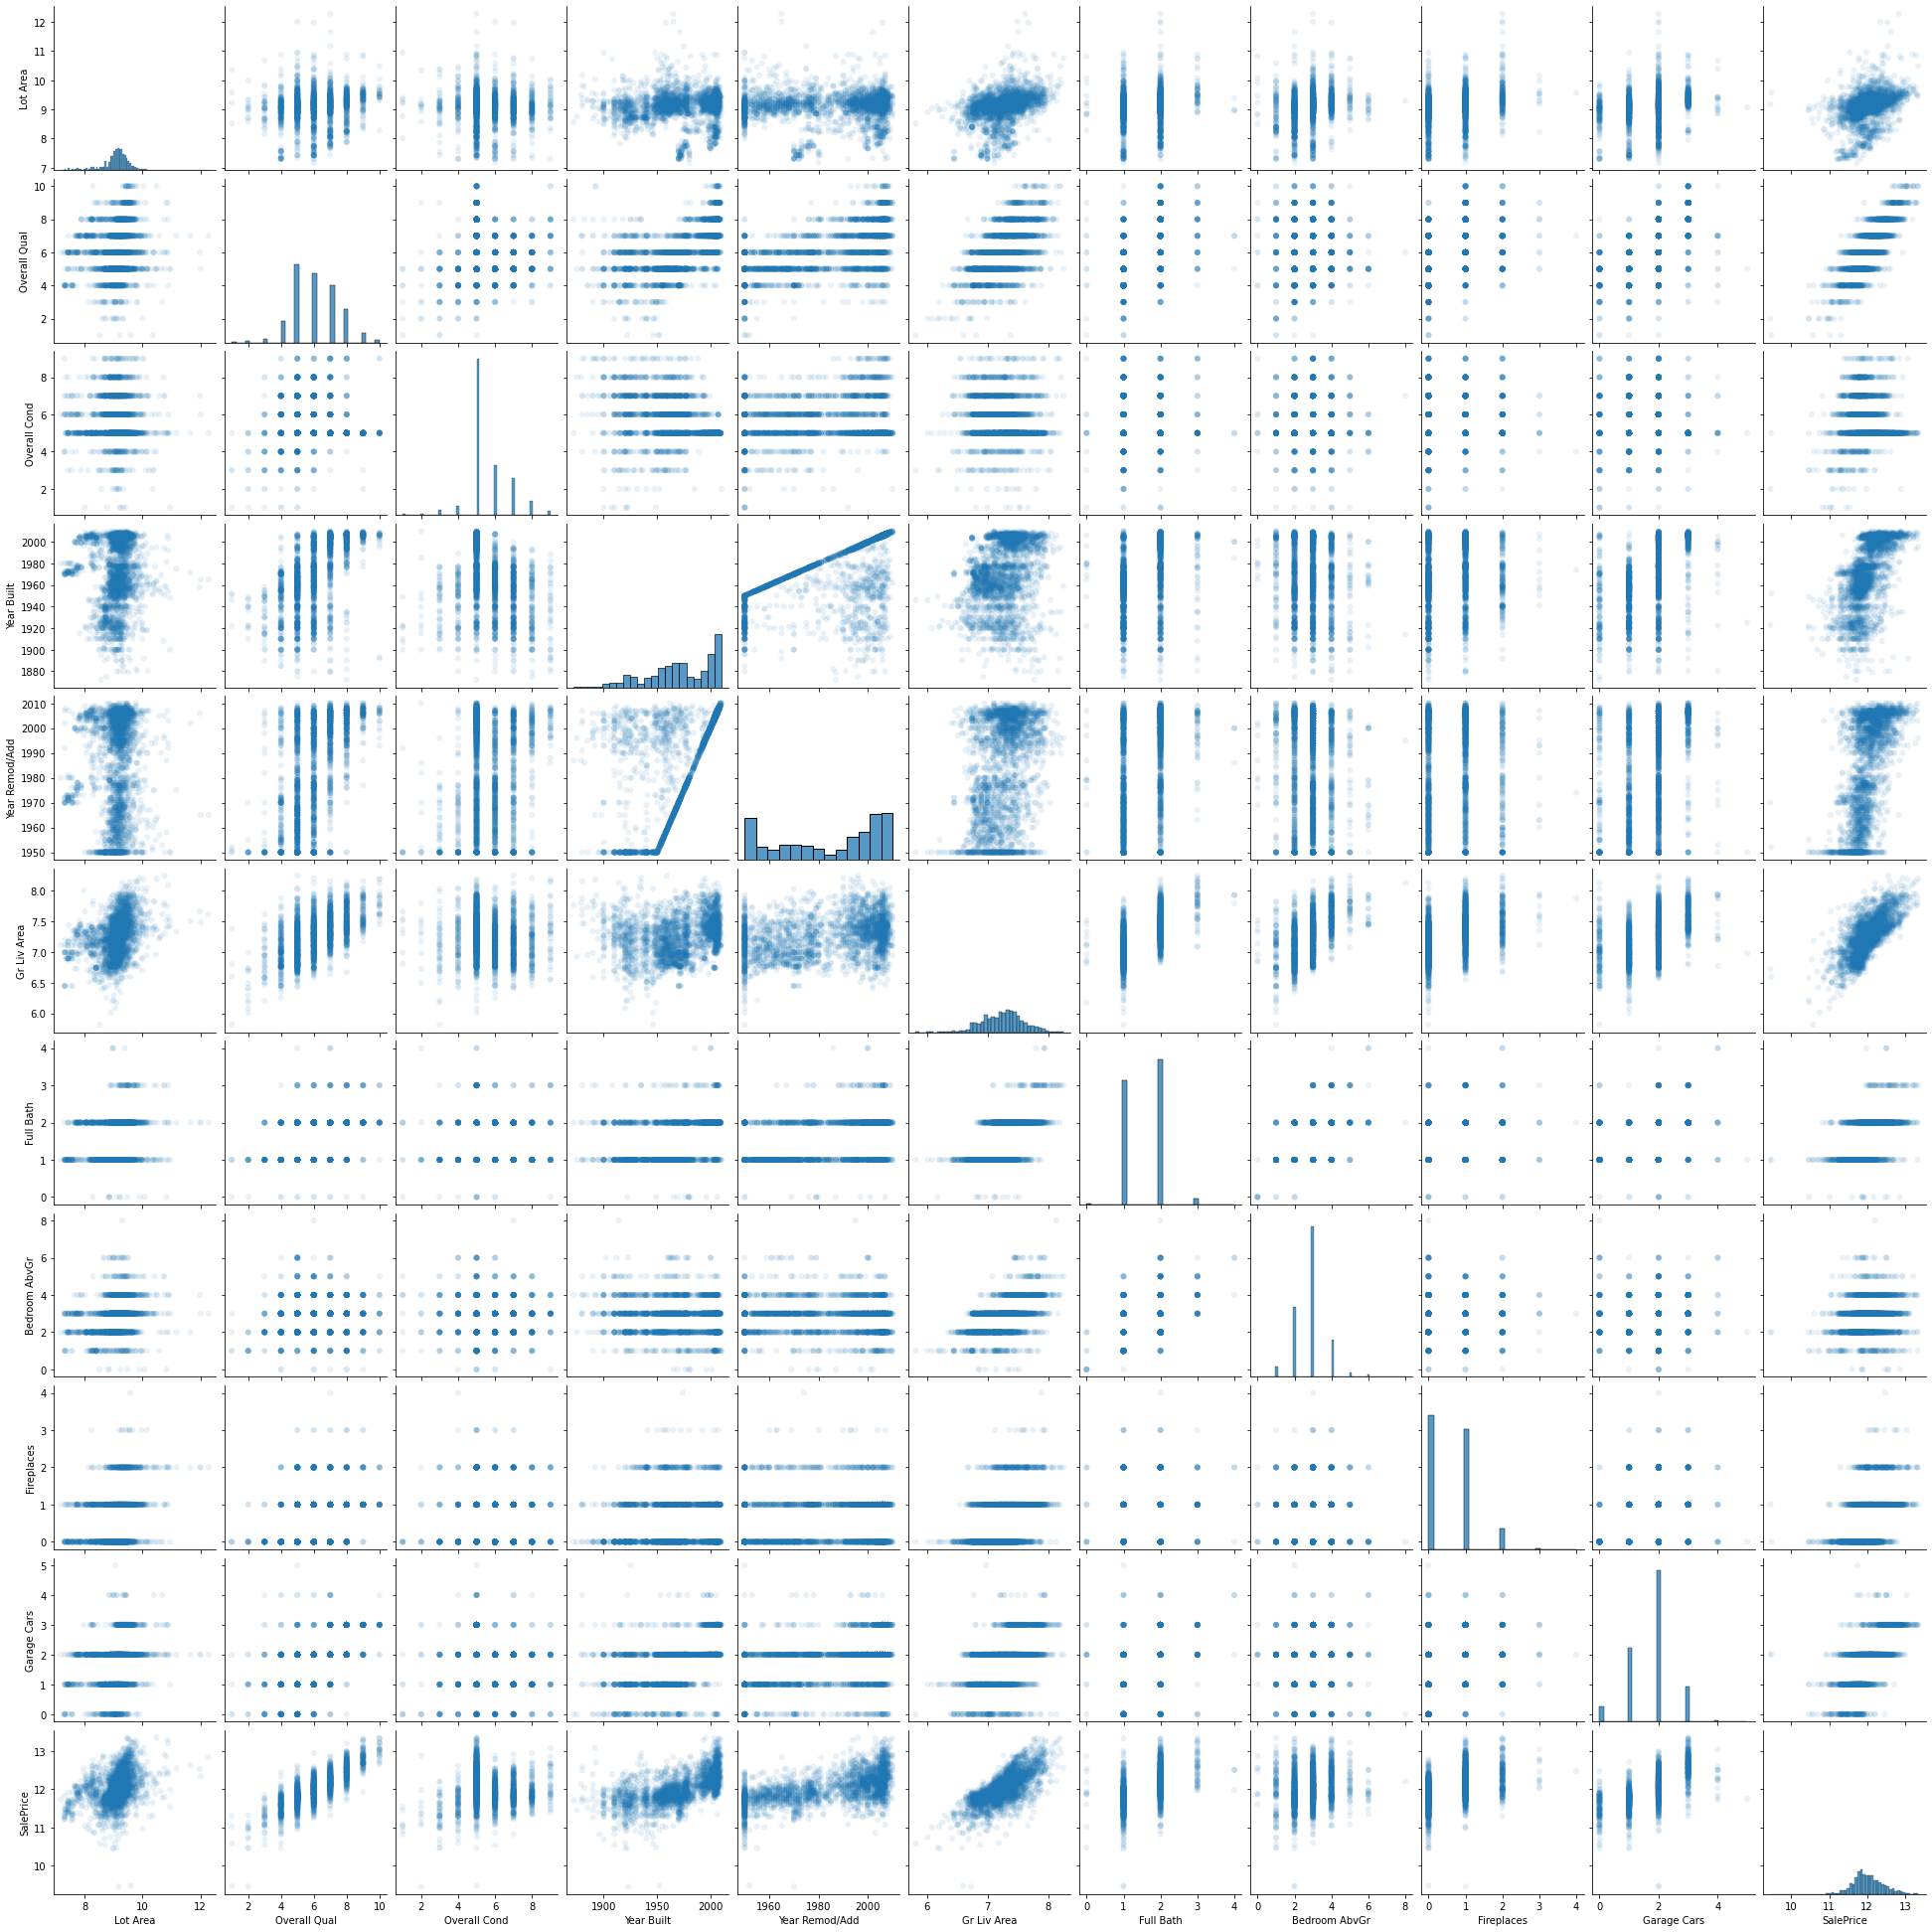

In [58]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

Except for Overall Qual, Gr Liv Area and Lot Area, orther variables seem to have a linear relationship with Sale Price. Therefore, a linear regression model is suited for our problem.

The target variable is Saleprice and its distribution now is a normal distribution
As we can see, 'Gr Liv Area', 'Lot Area' and 'Overall Qua'


In [60]:
#We separate feature variables and target variable
X= smaller_df[['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]
Y= smaller_df[['SalePrice']]


In [73]:
#Polynomial transformation
X2= X.copy()
X[['OQ2']]= X[['Overall Qual']]**2
X[['LA2']]= X[['Lot Area']]**2
X[['GLA2']]= X[['Gr Liv Area']]**2

In [77]:
#Interactive feature
X3 = X2.copy()
X3['OQ_x_YB']= X3['Overall Qual'] * X3['Year Built']
X3['OQ_/_LA']= X3['Overall Qual'] / X3['Lot Area']

In [88]:
#we encode for 2 category varieables: Neighborbood and House Style
X4= X3.copy()
HS_getdummies= pd.get_dummies(df['House Style'], drop_first= True)

In [90]:
nbh_counts= df['Neighborhood'].value_counts()
nbh_counts

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [103]:
#so some of values are very small, we just take them into "other" value
other_nbh= list(nbh_counts[nbh_counts.values <= 8].index)

In [104]:
X4['Neighborhood']= df['Neighborhood'].replace(other_nbh, 'Others')


In [110]:
#We want to see the allocation between catygory variable "House style" and quanity variable "Year built", and so for "Overall Qual" vs "Neighborhood"
X4['House Style'] = df['House Style']
def add_deviation_feature(X, feature, category):
    category_gb= X.groupby(category)[feature]
    category_mean= category_gb.transform(lambda x: x.mean())
    category_std= category_gb.transform(lambda x: x.std())
    deviation_feature= (X[feature] - category_mean)/category_std
    X[feature+ 'dev'+ category]= deviation_feature

In [111]:
X5= X4.copy()
add_deviation_feature(X5,'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')

In [113]:
X5['SalePrice']= Y
X5

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,OQ2,LA2,GLA2,OQ_x_YB,OQ_/_LA,Neighborhood,House Style,Year BuiltdevHouse Style,Overall QualdevNeighborhood,SalePrice
0,10.366309,6,5,1960,1960,7.412764,1,3,2,2.0,36,107.460366,54.949070,11760,0.578798,NAmes,1Story,-0.590334,0.857503,12.278398
1,9.360741,5,6,1961,1961,6.799056,1,2,0,1.0,25,87.623475,46.227161,9805,0.534146,NAmes,1Story,-0.551186,-0.430205,11.561725
2,9.565775,6,6,1958,1958,7.192934,1,3,0,1.0,36,91.504043,51.738303,11748,0.627236,NAmes,1Story,-0.668629,0.857503,12.055256
3,9.320181,7,5,1968,1968,7.654917,2,3,2,2.0,49,86.865771,58.597755,13776,0.751058,NAmes,1Story,-0.277154,2.145211,12.404928
4,9.534668,5,5,1997,1998,7.396335,2,3,1,2.0,25,90.909889,54.705776,9985,0.524402,Gilbert,2Story,0.545208,-2.101974,12.154258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,8.979417,6,6,1984,1984,6.911747,1,3,0,2.0,36,80.629923,47.772251,11904,0.668195,Mitchel,SLvl,0.505068,0.434947,11.867104
2926,9.092232,5,5,1983,1983,6.805723,1,2,0,2.0,25,82.668688,46.317859,9915,0.549920,Mitchel,1Story,0.310059,-0.518590,11.782960
2927,9.253591,5,5,1992,1992,6.878326,1,3,0,0.0,25,85.628954,47.311375,9960,0.540331,Mitchel,SFoyer,1.096487,-0.518590,11.790565
2928,9.211440,5,5,1974,1975,7.237059,1,2,1,2.0,25,84.850623,52.375023,9870,0.542803,Mitchel,1Story,-0.042269,-0.518590,12.043560


In [119]:
X5.corr()


,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,OQ2,LA2,GLA2,OQ_x_YB,OQ_/_LA,Year BuiltdevHouse Style,Overall QualdevNeighborhood,SalePrice
Lot Area,1.000000,0.134993,-0.032604,0.029099,0.039260,0.356673,0.169514,0.263562,0.280625,0.273606,0.144922,0.997832,0.359009,0.132003,-0.116989,0.025966,0.077732,0.368536
Overall Qual,0.134993,1.000000,-0.093902,0.596621,0.569498,0.587749,0.518713,0.061772,0.387174,0.598127,0.987493,0.135776,0.586176,0.998622,0.966457,0.576167,0.650696,0.827560
Overall Cond,-0.032604,-0.093902,1.000000,-0.368533,0.048356,-0.130024,-0.214322,-0.006207,-0.030648,-0.181384,-0.128592,-0.035410,-0.129129,-0.117375,-0.089047,-0.325197,0.139778,-0.048319
Year Built,0.029099,0.596621,-0.368533,1.000000,0.611444,0.269483,0.468485,-0.055650,0.167803,0.537146,0.587528,0.032006,0.266265,0.636425,0.592414,0.861587,0.106624,0.616823
Year Remod/Add,0.039260,0.569498,0.048356,0.611444,1.000000,0.340175,0.456708,-0.021801,0.130699,0.423511,0.560649,0.039567,0.338323,0.586472,0.560882,0.549009,0.198609,0.587849
Gr Liv Area,0.356673,0.587749,-0.130024,0.269483,0.340175,1.000000,0.650872,0.533752,0.454071,0.506582,0.578709,0.360044,0.999513,0.581907,0.498004,0.315550,0.343423,0.726106
Full Bath,0.169514,0.518713,-0.214322,0.468485,0.456708,0.650872,1.000000,0.358727,0.225748,0.474841,0.512026,0.171338,0.651324,0.528924,0.478096,0.450580,0.179170,0.575315
Bedroom AbvGr,0.263562,0.061772,-0.006207,-0.055650,-0.021801,0.533752,0.358727,1.000000,0.075856,0.090296,0.037344,0.259427,0.535055,0.053870,-0.009734,-0.014654,0.111894,0.178072
Fireplaces,0.280625,0.387174,-0.030648,0.167803,0.130699,0.454071,0.225748,0.075856,1.000000,0.319385,0.382407,0.287982,0.454926,0.381898,0.318548,0.159084,0.261522,0.487996
Garage Cars,0.273606,0.598127,-0.181384,0.537146,0.423511,0.506582,0.474841,0.090296,0.319385,1.000000,0.601708,0.274584,0.506325,0.609720,0.531192,0.477657,0.225288,0.674903


### Findings and Insights

 Overall Qual, Gr Liv Area, Overall Qua x Year Built, Overall/Lot Area are high correlated with SalePrice

In [122]:
X5[['House Style', 'Neighborhood', 'SalePrice']]

,House Style,Neighborhood,SalePrice
0,1Story,NAmes,12.278398
1,1Story,NAmes,11.561725
2,1Story,NAmes,12.055256
3,1Story,NAmes,12.404928
4,2Story,Gilbert,12.154258
...,...,...,...
2925,SLvl,Mitchel,11.867104
2926,1Story,Mitchel,11.782960
2927,SFoyer,Mitchel,11.790565
2928,1Story,Mitchel,12.043560


<AxesSubplot:xlabel='House Style', ylabel='SalePrice'>

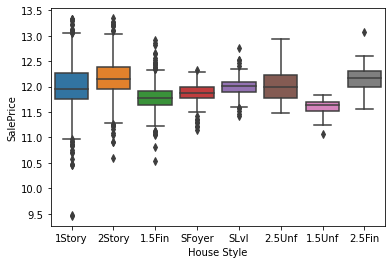

In [136]:
sns.boxplot(x= 'House Style', y= 'SalePrice', data = X5)

We can see the boxplot overlap a bit, so it is hard to say House Style has an statistic effect on Sale Price

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

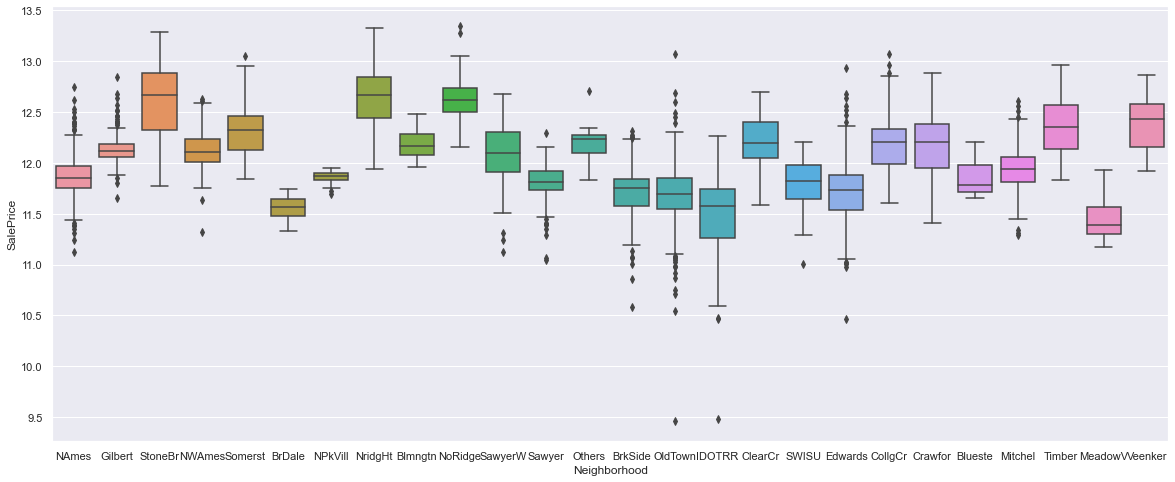

In [146]:
sns.set(rc={'figure.figsize':(20,8)})
sns.boxplot(x= 'Neighborhood', y = 'SalePrice', data= X5)

It appears that Neighborhood variable has an effect on SalePrice.

### Hypothesis testing
1/ Ho: There is no effect on SalePrice given by Neighborhood
   Ha: There is effect on SalePrice given by Neighborhood
  
2/ Ho: Gr Liv Area has a equal or stronger effect on SalePrice than Overall Qual
   Ha: Gr Liv Area has a weaker effect on SalePrice than Overall Qual
   
3/ Ho: The Overall Qual/Lot Area has an equal or stronger effect on SalePrice than Overall Qual x Year Built.
   Ha: The Overall Qual/Lot Area has a weaker effect on SalePrice than Overall Qual x Year Built
   
4/ Ho: Overall Qual x Year Built's distribution is a normal distribution
   Ha: Overall Qual x Year Built's distribution is not a normal distribution

In [218]:
# Hypothetis testing for No.4, asuming alpha= 0.05
import scipy
from scipy import stats
from scipy.stats import chisquare
X_hypo= X5['OQ_x_YB']
alpha= 0.05
p = stats.normaltest(X_hypo)
print('reject the Ho hypothesis' if p.pvalue < alpha else print('there is not enough evidence to reject Ho hypothesis'))
print(p.pvalue)

reject the Ho hypothesis
2.4218615113186322e-05


As a result, the distribution of Overall_x_Year Built is not a distribution. Therefore we need a transformation for this variable.
And, because of target of this section is predicting house price, which means a continuous variable, so the linear regression is quite suitable to be used. 